In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [166]:
df=pd.read_excel('final_feat.xlsx')

In [167]:
df1=df[['Completed Jobs','TMAX','Avg Sales','tech_count','Income_y']]

In [168]:
df1.head()

,Completed Jobs,TMAX,Avg Sales,tech_count,Income_y
0,57,65,3617.444828,59,23933.54
1,77,71,1781.345385,40,65232.03
2,55,69,459.248750,21,26195.32
3,6,69,846.000000,9,264.00
4,73,77,1820.060789,60,48506.16


In [169]:
df1=df1.drop_duplicates(ignore_index=True)

In [170]:
train=df1[0:300]
test=df1[300:]

In [171]:
y=train['Income_y']
X=train.drop(['Income_y'],axis=1)

In [172]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [173]:
from sklearn.linear_model import LinearRegression

In [174]:
# creating linear regression model

reg_model=LinearRegression(normalize=True)

In [175]:
# fit independent varaibles to the dependent variables
reg_model.fit(X_train,y_train)

LinearRegression(normalize=True)

In [176]:
reg_model.score(X_train,y_train)

0.6703731481112805

In [177]:
reg_model.score(X_test,y_test)

0.7595383606494059

In [178]:
y_=test['Income_y']
X_=test.drop(['Income_y'],axis=1)

In [179]:
reg_model.score(X_,y_)

0.3596790892992324

In [180]:
y_pred=reg_model.predict(X_)

In [181]:
comp=pd.DataFrame({'Actual':y_,'Predicted':y_pred})

<AxesSubplot:>

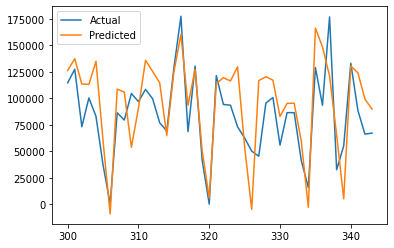

In [182]:
comp.plot()

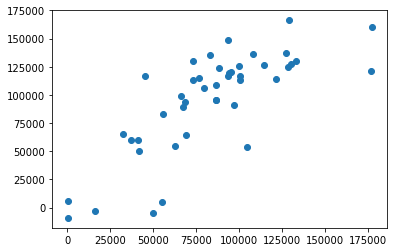

In [183]:
plt.scatter(y_,y_pred)

In [184]:
from sklearn import metrics

# RMSE and MAE
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_,y_pred)))
print('MAE:',metrics.mean_absolute_error(y_,y_pred))

RMSE: 30935.802557531748
MAE: 25420.229553011726


In [185]:
comp['Error']=comp['Actual']-comp['Predicted']

In [186]:
comp

,Actual,Predicted,Error
300,114534.21,126162.087026,-11627.877026
301,127412.10,137384.699728,-9972.599728
302,73107.94,113519.156998,-40411.216998
303,100335.70,113091.804895,-12756.104895
304,82920.44,134950.872934,-52030.432934
305,36992.00,59676.858477,-22684.858477
306,326.00,-9179.715156,9505.715156
307,86287.17,108683.381206,-22396.211206
308,79380.38,105747.054959,-26366.674959
309,104509.01,53692.994466,50816.015534


# Ridge 

In [187]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [188]:
# Intializig ridge model
reg_model_1=Ridge()

In [189]:
# lamda parameter range 

hyperparameter_range={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]}

In [190]:
# Searching best hyperparameter using gridsearch 

ridge_reg=GridSearchCV(reg_model_1,hyperparameter_range,scoring='neg_root_mean_squared_error',cv=5)
ridge_reg.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75,
                                   80, 85, 90, 95, 100]},
             scoring='neg_root_mean_squared_error')

In [191]:
# Best lamda
ridge_reg.best_params_

{'alpha': 100}

In [192]:
# error value 
ridge_reg.best_score_

-37830.32891942836

In [193]:
reg_model_2=Ridge(alpha=100)

In [194]:
reg_model_2.fit(X_train,y_train)

Ridge(alpha=100)

In [195]:
reg_model_2.score(X_train,y_train)

0.6703722367727569

In [196]:
reg_model_2.score(X_test,y_test)

0.7595157570754414

In [197]:
reg_model_2.score(X_,y_)

0.35992118221021285

In [198]:
y_pre_1=reg_model_2.predict(X_)

In [199]:
# RMSE and MAE
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_,y_pre_1)))
print('MAE:',metrics.mean_absolute_error(y_,y_pre_1))

RMSE: 30929.953891342073
MAE: 25414.39429108107


In [200]:
comp_2=pd.DataFrame({'Actual':y_,'Predicted':y_pre_1})

<AxesSubplot:>

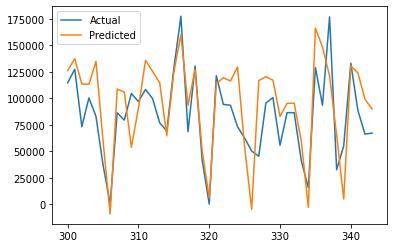

In [201]:
comp_2.plot()

In [202]:
comp_2['Error']=comp_2['Actual']-comp_2['Predicted']

In [203]:
comp_2

,Actual,Predicted,Error
300,114534.21,126060.844522,-11526.634522
301,127412.10,137383.235706,-9971.135706
302,73107.94,113507.608893,-40399.668893
303,100335.70,113174.887606,-12839.187606
304,82920.44,134823.396283,-51902.956283
305,36992.00,59600.210345,-22608.210345
306,326.00,-9155.176078,9481.176078
307,86287.17,108697.367378,-22410.197378
308,79380.38,105746.207622,-26365.827622
309,104509.01,53649.704763,50859.305237


# Lasso

In [204]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [205]:
# Intializing the model 
reg_model_3=Lasso()

In [206]:
# hyper parameter range 
hyperparameters_range={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]}

In [207]:
# Searching best hyper parameter 

lasso_reg=GridSearchCV(reg_model_3,hyperparameters_range,scoring='neg_root_mean_squared_error',cv=5)

lasso_reg.fit(X,y)

C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 185455617321.42416, tolerance: 113208329.05439414
  positive)
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167882779636.40912, tolerance: 105941111.49883024
  positive)
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 153458072218.88168, tolerance: 101486300.93390363
  positive)
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dua

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75,
                                   80, 85, 90, 95, 100]},
             scoring='neg_root_mean_squared_error')

In [208]:
#best parameters
lasso_reg.best_params_

{'alpha': 100}

In [209]:
#best score
lasso_reg.best_score_

-37832.625339535705

In [210]:
lasso_pre=Lasso(alpha=100)

In [211]:
lasso_pre.fit(X_train,y_train)

Lasso(alpha=100)

In [212]:
#train score
lasso_pre.score(X_train,y_train)

0.6703730888862354

In [213]:
# test score
lasso_pre.score(X_test,y_test)

0.7595106178758166

In [214]:
#unseen data
lasso_pre.score(X_,y_)

0.3595122118766717

In [215]:
y_pre_2=lasso_pre.predict(X_)

In [216]:
# RMSE and MAE
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_,y_pre_2)))
print('MAE:',metrics.mean_absolute_error(y_,y_pre_2))

RMSE: 30939.83346656301
MAE: 25423.777738222376


In [217]:
comp_3=pd.DataFrame({'Actual':y_,'Predicted':y_pre_2})

<AxesSubplot:title={'center':'Lasso Regression'}>

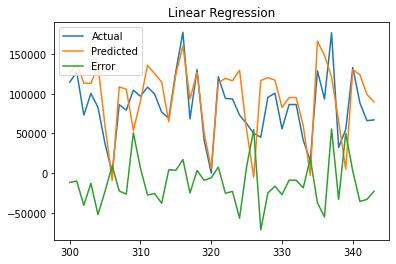

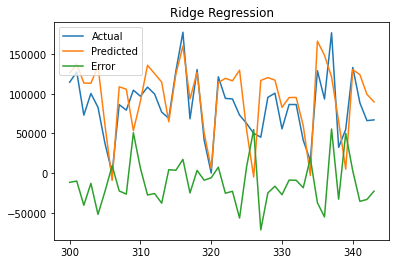

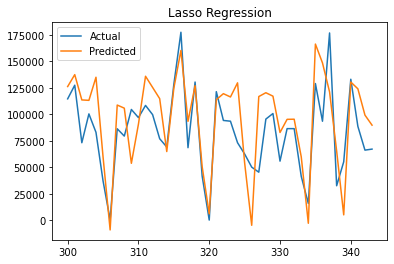

In [218]:
#comparision 
comp.plot(title='Linear Regression')
comp_2.plot(title='Ridge Regression')
comp_3.plot(title='Lasso Regression')

In [219]:
print('====Linear Regression========')
# RMSE and MAE
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_,y_pred)))
print('MAE:',metrics.mean_absolute_error(y_,y_pred))


print('====Ridge Regression========')

# RMSE and MAE
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_,y_pre_1)))
print('MAE:',metrics.mean_absolute_error(y_,y_pre_1))

print('====Lasso Regression========')

# RMSE and MAE
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_,y_pre_2)))
print('MAE:',metrics.mean_absolute_error(y_,y_pre_2))

====Linear Regression========
RMSE: 30935.802557531748
MAE: 25420.229553011726
====Ridge Regression========
RMSE: 30929.953891342073
MAE: 25414.39429108107
====Lasso Regression========
RMSE: 30939.83346656301
MAE: 25423.777738222376
